In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data_1000.csv')
df

,Title,energy,fat,protein,salt,saturates,sugars,remarks
0,Yogurt Parfaits,81.129461,2.140139,6.914437,0.055978,0.365347,5.086341,1.0
1,"Salt Free, Low Cholesterol Sugar Cookies Recipe",477.096404,23.412486,7.625492,0.548621,3.425054,14.298443,0.0
2,Honey Sriracha Chicken Wings,208.058983,14.297046,15.383456,1.063915,4.535687,3.048951,1.0
3,Shrimp and Caper Salad,194.752596,15.980767,11.946687,0.614843,2.366704,0.314583,1.0
4,Natural Peanut Butter Chocolate Bon Bons,303.435400,5.094847,5.067961,0.019791,2.048394,63.210605,0.0
...,...,...,...,...,...,...,...,...
16377,Back-To-School Raspberry Granola Bars,578.550488,49.338998,1.001004,0.371370,30.320862,34.483957,NaN
16378,Chocolate Toffee Bites,638.768632,62.901880,1.199706,0.041489,38.736438,19.112361,NaN
16379,Buttermilk Horseradish Dressing,40.215671,0.886831,3.262967,1.441130,0.537045,4.861279,NaN
16380,Steamed White Rice,39.945440,0.085737,0.828137,0.006820,0.023772,0.015588,NaN


In [3]:
print(df.isnull().sum())


Title            0
energy           0
fat              0
protein          0
salt             0
saturates        0
sugars           0
remarks      15364
dtype: int64


In [4]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)


Title         0.000000
energy        0.000000
fat           0.000000
protein       0.000000
salt          0.000000
saturates     0.000000
sugars        0.000000
remarks      93.785863
dtype: float64


In [5]:
rows_with_missing = df[df.isnull().any(axis=1)]
print(rows_with_missing)


                                                 Title      energy        fat  \
1018   Marinade for Chicken on the Grill from Savannah   66.283241   1.735393   
1019                                  Cardamom Cookies  382.845721   3.532435   
1020                Filling Asian Sweet Potato Cookies  288.075281  10.542622   
1021                              Bowler Beef Marinade  192.854270  14.750972   
1022                                 Blackened Catfish  296.452744  26.995334   
...                                                ...         ...        ...   
16377            Back-To-School Raspberry Granola Bars  578.550488  49.338998   
16378                           Chocolate Toffee Bites  638.768632  62.901880   
16379                  Buttermilk Horseradish Dressing   40.215671   0.886831   
16380                               Steamed White Rice   39.945440   0.085737   
16381                                   Taco Seasoning  301.193756   6.737068   

         protein      salt 

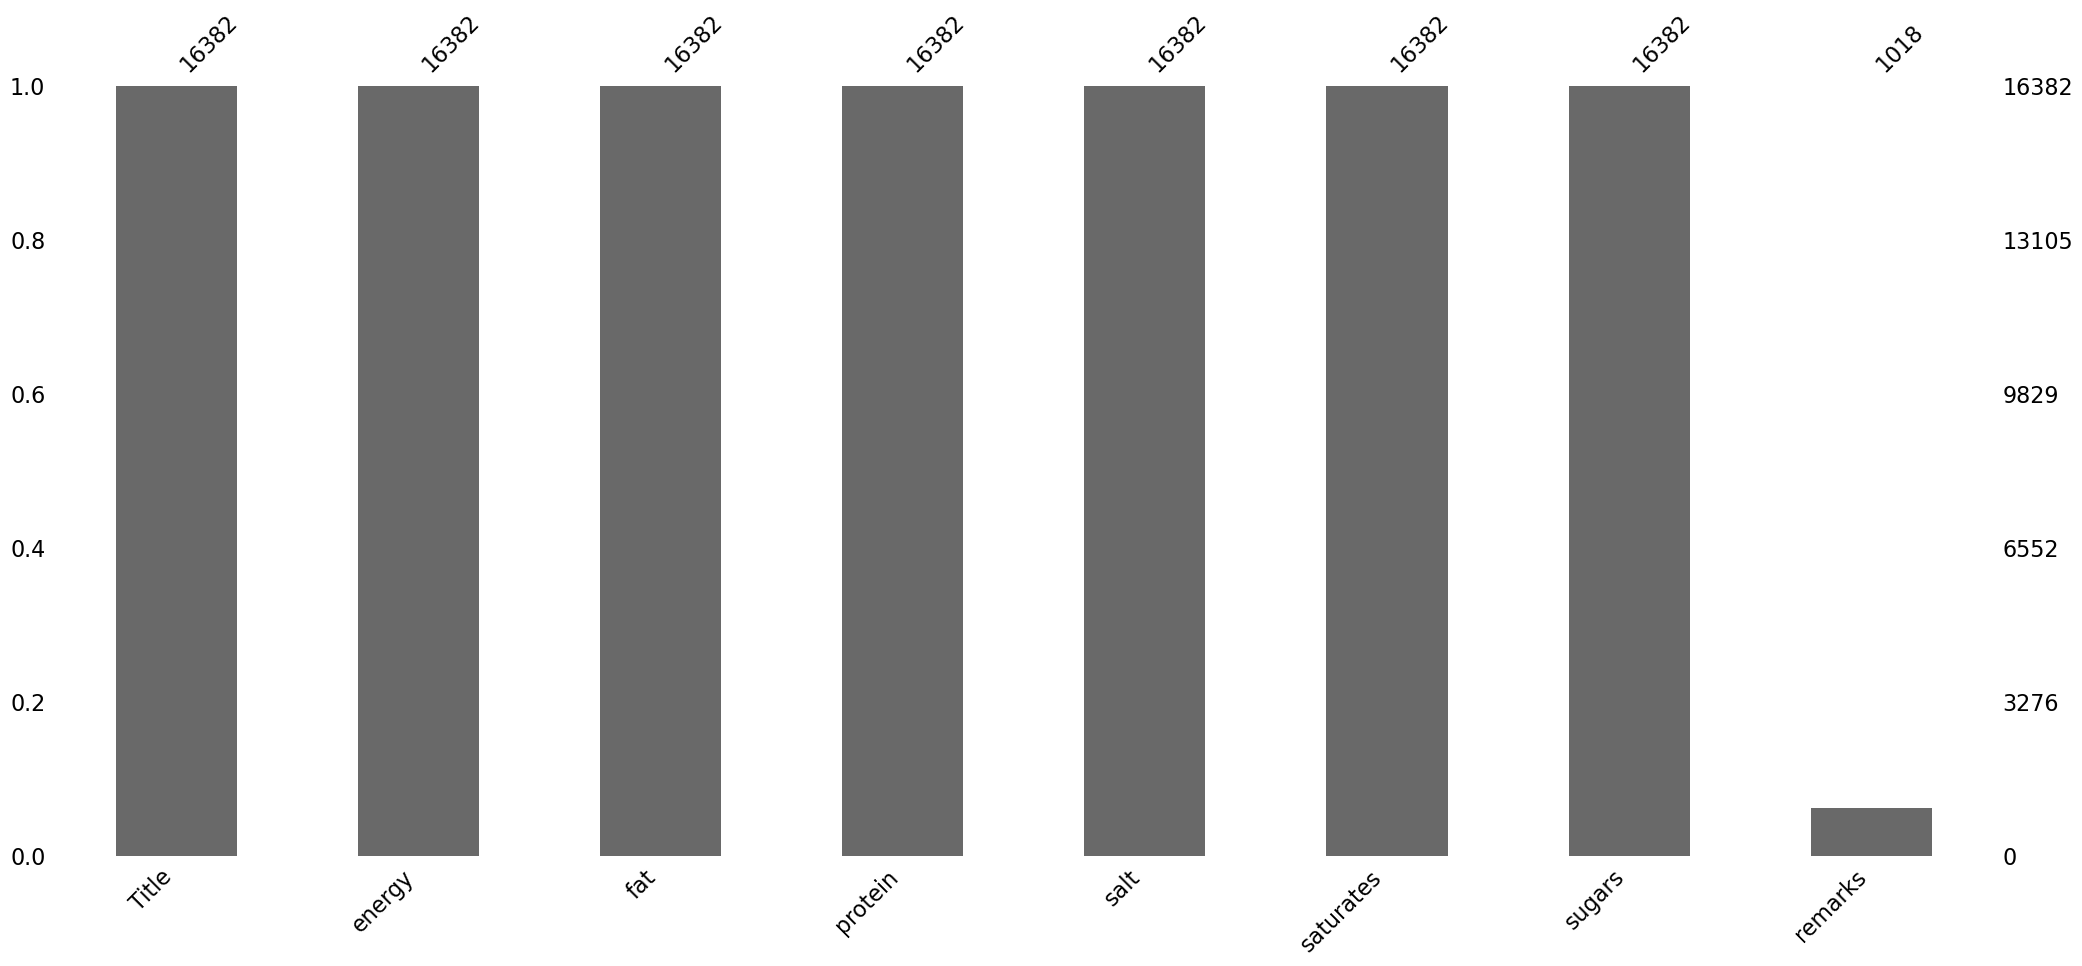

In [7]:
import missingno as msno


msno.bar(df)
plt.show()


In [8]:
df_new = df.dropna(subset=['remarks'])  # remove all missing values
print(df_new.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1017
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      1018 non-null   object 
 1   energy     1018 non-null   float64
 2   fat        1018 non-null   float64
 3   protein    1018 non-null   float64
 4   salt       1018 non-null   float64
 5   saturates  1018 non-null   float64
 6   sugars     1018 non-null   float64
 7   remarks    1018 non-null   float64
dtypes: float64(7), object(1)
memory usage: 71.6+ KB
None


In [9]:
df_new.head()

,Title,energy,fat,protein,salt,saturates,sugars,remarks
0,Yogurt Parfaits,81.129461,2.140139,6.914437,0.055978,0.365347,5.086341,1.0
1,"Salt Free, Low Cholesterol Sugar Cookies Recipe",477.096404,23.412486,7.625492,0.548621,3.425054,14.298443,0.0
2,Honey Sriracha Chicken Wings,208.058983,14.297046,15.383456,1.063915,4.535687,3.048951,1.0
3,Shrimp and Caper Salad,194.752596,15.980767,11.946687,0.614843,2.366704,0.314583,1.0
4,Natural Peanut Butter Chocolate Bon Bons,303.435400,5.094847,5.067961,0.019791,2.048394,63.210605,0.0


In [10]:
x = df_new.iloc[:,1:7].values
x.shape

(1018, 6)

In [11]:
y = df_new.iloc[:,7:].values
y.shape

(1018, 1)

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 9)

In [14]:
x_train.shape

(814, 6)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
classifier = DecisionTreeClassifier()

In [17]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = classifier.predict(x_test)

In [19]:
from sklearn.metrics import classification_report, accuracy_score

In [20]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [21]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       136
         1.0       0.64      0.56      0.60        68

    accuracy                           0.75       204
   macro avg       0.72      0.70      0.71       204
weighted avg       0.74      0.75      0.75       204

